In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

## 原始數據

In [2]:
n = 24
x = [*range(n)]
y = [33, 56 , 87, 104, 160 ,183, 133, 216, 281, 382, 384, 442, 431, 439, 551, 744, 874, 1209, 1199, 1210, 1390, 1626, 2386, 2969]
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

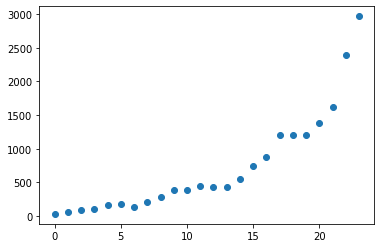

In [3]:
plt.scatter(x, y)

## 使用線性回歸預測

In [4]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

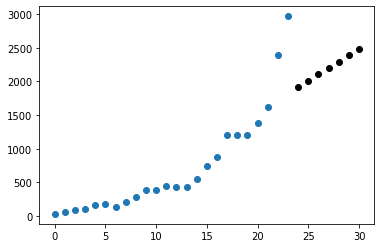

In [5]:
nx = np.array([*range(n, 31)]).reshape(-1, 1)
predict = model.predict(nx)
plt.scatter(x, y)
plt.scatter(nx, predict, c='black')

In [6]:
print(predict)

[[1916.30072464]
 [2011.30811594]
 [2106.31550725]
 [2201.32289855]
 [2296.33028986]
 [2391.33768116]
 [2486.34507246]]


## 使用多項式回歸

### degree = 4

array([[ 3470.83646245],
       [ 4231.53962451],
       [ 5138.68582396],
       [ 6210.87475677],
       [ 7467.8057591 ],
       [ 8930.27780734],
       [10620.1895181 ],
       [12560.53914818],
       [14775.42459462],
       [17290.04339466],
       [20130.69272577],
       [23324.76940562],
       [26900.76989209],
       [30888.2902833 ],
       [35318.02631756],
       [40221.77337341]])

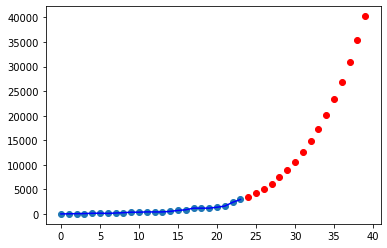

In [36]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)
model2 = LinearRegression()
model2.fit(x_poly, y)

nx = np.array([*range(n, 40)]).reshape(-1, 1)
px = poly.fit_transform(nx)
ny = model2.predict(px)
plt.scatter(x, y)
plt.scatter(nx, ny, color='red')
plt.plot(x, y, color='blue')
display(ny)

## 調整模型

In [24]:
# 建立一個用來調整的函數
def f(start, n, degree):
    rx = x[:n]
    ry = y[:n]
    poly = PolynomialFeatures(degree=degree)
    model = LinearRegression()
    model.fit(poly.fit_transform(rx), ry)
    plt.scatter(rx, ry)
    plt.scatter(x[n:], y[n:])
    plt.plot(x[n:], model.predict(poly.fit_transform(x[n:])))
    print(model.predict(poly.fit_transform(x[n:])))

[[2435.80463015]]


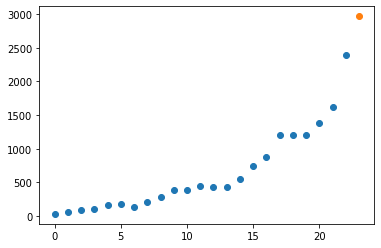

In [31]:
f(0, 23, 3)

In [11]:
print(y[22])

[2386]


[[2435.80463015]]


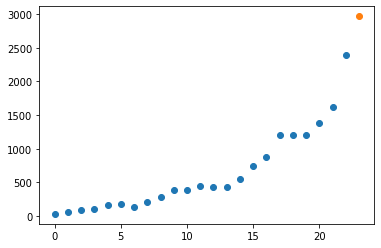

In [23]:
f(0, 23, 3)

## 由上面發現degree = 3時較接近真實結果

array([[ 3149.1916996 ],
       [ 3652.57905138],
       [ 4213.33858316],
       [ 4834.67502787],
       [ 5519.79311848],
       [ 6271.89758792],
       [ 7094.19316915],
       [ 7989.88459512],
       [ 8962.17659876],
       [10014.27391304],
       [11149.3812709 ],
       [12370.70340529],
       [13681.44504915],
       [15084.81093544],
       [16584.0057971 ],
       [18182.23436708],
       [19882.70137833],
       [21688.6115638 ],
       [23603.16965643],
       [25629.58038918]])

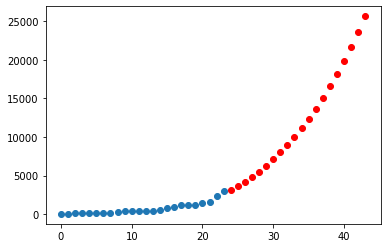

In [39]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
model3 = LinearRegression()
model3.fit(x_poly, y)

nx = np.array([*range(n, n+20)]).reshape(-1, 1)
px = poly.fit_transform(nx)
ny = model3.predict(px)
plt.scatter(x, y)
plt.scatter(nx, ny, color='red')
display(ny)